<a href="https://colab.research.google.com/github/Rajnish379/Machine_Learning/blob/main/Midterm_rmalred1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Colabs

Machine Learning Crash Course uses Colaboratories (Colabs) for all programming exercises. Colab is Google's implementation of [Jupyter Notebook](https://jupyter.org/). For more information about Colabs and how to use them, go to [Welcome to Colaboratory](https://research.google.com/colaboratory).

# Simple Linear Regression with Synthetic Data

In this first Colab, you'll explore linear regression with a simple database.

## Learning objectives:

After doing this exercise, you'll know how to do the following:

  * Run Colabs.
  * Tune the following [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter):
    * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
    * number of [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
    * [batch size](https://developers.google.com/machine-learning/glossary/#batch_size)
  * Interpret different kinds of [loss curves](https://developers.google.com/machine-learning/glossary/#loss_curve).

## Import relevant modules

The following cell imports the packages that the program requires:

In [ ]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt


## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass.

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [ ]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1,
                                  input_shape=(1,)))

  # Compile the model topography into code that
  # TensorFlow can efficiently execute. Configure
  # training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the
  # model. The model will train for the specified number
  # of epochs, gradually learning how the feature values
  # relate to the label values.
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs, validation_split=0.5)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the
  # rest of history.
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean
  # squared error at each epoch.
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse, model

print("Defined build_model and train_model")

Defined build_model and train_model


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [ ]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  trained_weight = trained_weight[0][0]
  trained_bias = trained_bias[0]
  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = feature.min()
  y0 = trained_bias + (trained_weight * x0)
  x1 = feature.max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Define the dataset

The dataset consists of 150 [examples](https://developers.google.com/machine-learning/glossary/#example). Each example consists of one [feature](https://developers.google.com/machine-learning/glossary/#feature) and one [label](https://developers.google.com/machine-learning/glossary/#label).


In [ ]:
import numpy as np
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target
print(iris.feature_names)
var = 0 # Var 0 indicates first element of feature_names list i.e., sepal length
my_feature = iris_data[:, var] #use sepal_length to predict the target. This will be changed accordingly based on which feature variable we are using
# Here we are defining the label at only one place because we will be using the same target variable for all of our three models
my_label = iris_data[:, 2] #target is petal_length. Here we have put 2 because petal length is the second column in our data set

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Specify the hyperparameters

The hyperparameters in this Colab are as follows:

  * [learning rate](https://developers.google.com/machine-learning/glossary/#learning_rate)
  * [epochs](https://developers.google.com/machine-learning/glossary/#epoch)
  * [batch_size](https://developers.google.com/machine-learning/glossary/#batch_size)

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

Epoch 1/150
15/15 [==============================] - 1s 15ms/step - loss: 3.8814 - root_mean_squared_error: 1.9701 - val_loss: 9.0697 - val_root_mean_squared_error: 3.0116
Epoch 2/150
15/15 [==============================] - 0s 5ms/step - loss: 1.5779 - root_mean_squared_error: 1.2562 - val_loss: 6.4420 - val_root_mean_squared_error: 2.5381
Epoch 3/150
15/15 [==============================] - 0s 6ms/step - loss: 1.4139 - root_mean_squared_error: 1.1891 - val_loss: 3.2791 - val_root_mean_squared_error: 1.8108
Epoch 4/150
15/15 [==============================] - 0s 8ms/step - loss: 1.5054 - root_mean_squared_error: 1.2270 - val_loss: 6.4318 - val_root_mean_squared_error: 2.5361
Epoch 5/150
15/15 [==============================] - 0s 5ms/step - loss: 1.4261 - root_mean_squared_error: 1.1942 - val_loss: 4.7902 - val_root_mean_squared_error: 2.1886
Epoch 6/150
15/15 [==============================] - 0s 5ms/step - loss: 1.4199 - root_mean_squared_error: 1.1916 - val_loss: 5.0351 - val_root_

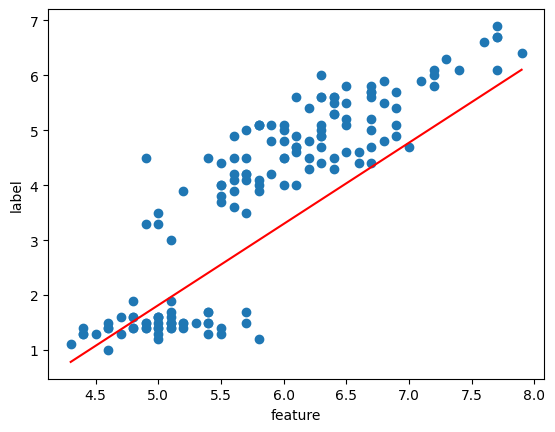

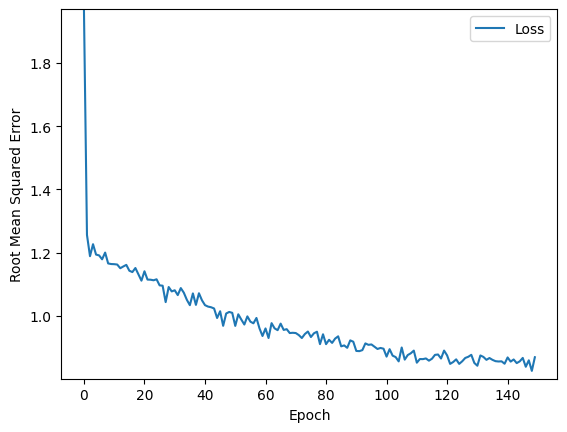

In [ ]:
# These hyperparameters were calculated after running the model for various sets of values. These values were the ideal ones for me because the model had
# minimum rmse when i have used these set of hyperparameters. Same goes for the rest of the two models
learning_rate=0.03
epochs=150
my_batch_size=5

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse, my_model = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
#1st way:
from sklearn.metrics import mean_squared_error
y_pred = my_model.predict(my_feature).flatten()
print('rmse =', np.sqrt(mean_squared_error(my_label, y_pred)))

5/5 [==============================] - 0s 2ms/step
rmse = 1.1508059654425506


In [ ]:
#2nd way:
m = trained_weight[0][0]
c = trained_bias[0]

y_pred = m * my_feature + c

rmse = (sum(((my_label - y_pred) ** 2)) / len(my_label))**0.5
print(rmse)

1.1508059936993673


In [ ]:
print(f'{iris.feature_names[var]} with {m=} and {c=} gives us {rmse=}')

sepal length (cm) with m=1.4777043 and c=-5.5713854 gives us rmse=1.1508059936993673


In [ ]:
# We have to change the my_feature variable and then build and train the model again because our feature is different now. Target remains the same
var = 1
my_feature = iris_data[:, var] #use sepal_width to predict the target

Epoch 1/350
8/8 [==============================] - 1s 30ms/step - loss: 3.0720 - root_mean_squared_error: 1.7527 - val_loss: 11.3710 - val_root_mean_squared_error: 3.3721
Epoch 2/350
8/8 [==============================] - 0s 9ms/step - loss: 2.5182 - root_mean_squared_error: 1.5869 - val_loss: 9.5568 - val_root_mean_squared_error: 3.0914
Epoch 3/350
8/8 [==============================] - 0s 7ms/step - loss: 2.4819 - root_mean_squared_error: 1.5754 - val_loss: 9.6166 - val_root_mean_squared_error: 3.1011
Epoch 4/350
8/8 [==============================] - 0s 9ms/step - loss: 2.4978 - root_mean_squared_error: 1.5804 - val_loss: 9.5424 - val_root_mean_squared_error: 3.0891
Epoch 5/350
8/8 [==============================] - 0s 9ms/step - loss: 2.4783 - root_mean_squared_error: 1.5743 - val_loss: 9.7403 - val_root_mean_squared_error: 3.1209
Epoch 6/350
8/8 [==============================] - 0s 7ms/step - loss: 2.4426 - root_mean_squared_error: 1.5629 - val_loss: 9.2452 - val_root_mean_square

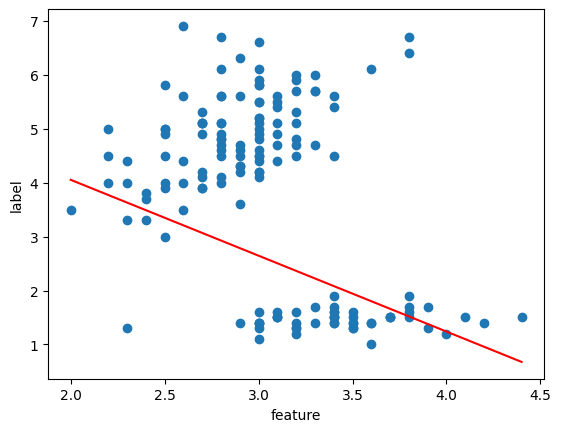

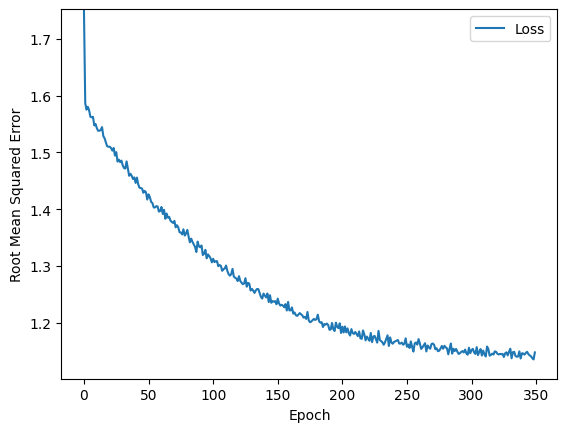

In [ ]:
learning_rate=0.02
epochs=350
my_batch_size=10

my_model = build_model(learning_rate)   # We are building the model again from scratch with a new learning rate as the input argument
trained_weight, trained_bias, epochs, rmse, my_model = train_model(my_model, my_feature,  # The new feature is used here to train the model again
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
#2nd way:
m = trained_weight[0][0]
c = trained_bias[0]

y_pred = m * my_feature + c

rmse = (sum(((my_label - y_pred) ** 2)) / len(my_label))**0.5
print(rmse)

1.9933555959123712


In [ ]:
print(f'{iris.feature_names[var]} with {m=} and {c=} gives us {rmse=}')

sepal width (cm) with m=-1.4052063 and c=6.860189 gives us rmse=1.9933555959123712


In [ ]:
var = 3
my_feature = iris_data[:, var] #use petal_width to predict the target

Epoch 1/100
15/15 [==============================] - 1s 21ms/step - loss: 9.4959 - root_mean_squared_error: 3.0815 - val_loss: 30.0395 - val_root_mean_squared_error: 5.4808
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 5.6361 - root_mean_squared_error: 2.3741 - val_loss: 19.4831 - val_root_mean_squared_error: 4.4140
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 3.4007 - root_mean_squared_error: 1.8441 - val_loss: 12.4611 - val_root_mean_squared_error: 3.5300
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 2.0684 - root_mean_squared_error: 1.4382 - val_loss: 7.6158 - val_root_mean_squared_error: 2.7597
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 1.2161 - root_mean_squared_error: 1.1028 - val_loss: 3.8067 - val_root_mean_squared_error: 1.9511
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.8225 - root_mean_squared_error: 0.9069 - val_loss: 2.1589 - val_ro

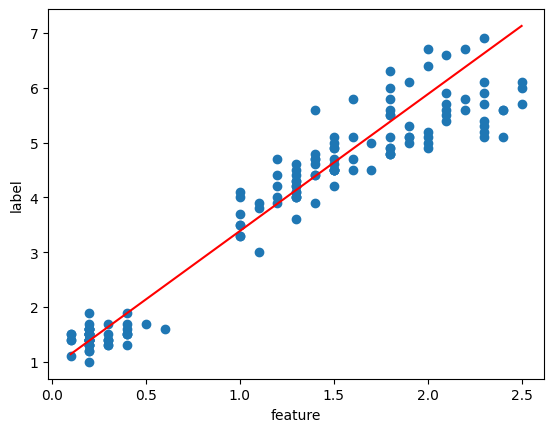

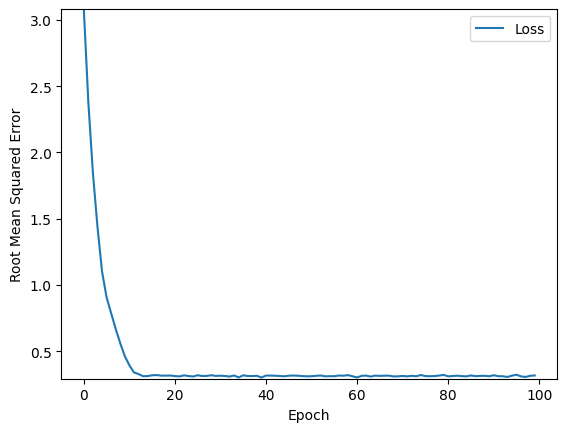

In [ ]:
learning_rate=0.03
epochs=100
my_batch_size=5

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse, my_model = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [ ]:
#2nd way:
m = trained_weight[0][0]
c = trained_bias[0]

y_pred = m * my_feature + c

rmse = (sum(((my_label - y_pred) ** 2)) / len(my_label))**0.5
print(rmse)

0.5304569582000743


In [ ]:
print(f'{iris.feature_names[var]} with {m=} and {c=} gives us {rmse=}')

petal width (cm) with m=2.4934819 and c=0.89265865 gives us rmse=0.5304569582000743


In [ ]:
# learning_rate = [0.5,0.5,0.5]
# epochs = [100,100,100]
# my_batch_size = [5,5,5]
# var = [0,1,3]
# my_label = iris_data[:, 2]
# m = []
# c = []
# root_mean_square_errors = []

# for i in range(3):
#   my_model = build_model(learning_rate[i])
#   my_feature = iris_data[:,var[i]]
#   trained_weight, trained_bias, epoch, rmse, my_model = train_model(my_model, my_feature,
#                                                          my_label, epochs[i],
#                                                          my_batch_size[i])
#   plot_the_model(trained_weight, trained_bias, my_feature, my_label)
#   plot_the_loss_curve(epoch, rmse)
#   m.append(trained_weight[0][0])
#   c.append(trained_bias[0])

#   y_pred = trained_weight[0][0] * my_feature + trained_bias[0]
#   r = (sum(((my_label - y_pred) ** 2)) / len(my_label))**0.5
#   root_mean_square_errors.append(r)



In [ ]:
# for i in range(3):
#   print(f'{iris.feature_names[var[i]]} with {m[i]=} and {c[i]=} gives us {root_mean_square_errors[i]=}')